In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#  Training text (sequence to learn patterns from)
data = "martand"

In [3]:
# 🔤 Create character mappings
chars = sorted(list(set(data)))
char_to_idx = {ch: i for i, ch in enumerate(chars)}  # map each char → index
idx_to_char = {i: ch for i, ch in enumerate(chars)}  # map index → char


In [4]:
# One-hot encoding function
def one_hot(i, size):
    v = np.zeros(size)
    v[i] = 1
    return v

In [5]:
# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [6]:
#  Initialize model parameters
hidden_size = 32                               # number of neurons in hidden layer
input_size = output_size = len(chars)          # same as number of unique characters
W_xh = np.random.randn(hidden_size, input_size) * 0.1  # input → hidden weights
W_hh = np.random.randn(hidden_size, hidden_size) * 0.1 # hidden → hidden weights
W_hy = np.random.randn(output_size, hidden_size) * 0.1 # hidden → output weights
b_h = np.zeros((hidden_size, 1))               # hidden bias
b_y = np.zeros((output_size, 1))               # output bias
lr = 0.05                                      # learning rate

In [7]:
losses = []  # store loss for each epoch

In [8]:
#  Training phase
for epoch in range(500):
    h = np.zeros((hidden_size, 1))  # reset hidden state at start of each epoch
    loss = 0                        # track total loss in this epoch

    #  Loop through each character in sequence
    for t in range(len(data) - 1):
        # Prepare input and true output
        x = one_hot(char_to_idx[data[t]], input_size).reshape(-1, 1)
        y_true = one_hot(char_to_idx[data[t + 1]], output_size).reshape(-1, 1)

        # Forward pass: compute hidden and output predictions
        h = sigmoid(np.dot(W_xh, x) + np.dot(W_hh, h) + b_h)
        y_pred = np.dot(W_hy, h) + b_y

        # Apply softmax to get probabilities
        p = np.exp(y_pred) / np.sum(np.exp(y_pred))

        # Compute cross-entropy loss
        loss -= np.sum(y_true * np.log(p + 1e-9))

        #  Backpropagation
        dy = p - y_true
        W_hy -= lr * np.dot(dy, h.T)
        b_y -= lr * dy

        dh = np.dot(W_hy.T, dy) * sigmoid_derivative(h)
        W_xh -= lr * np.dot(dh, x.T)
        W_hh -= lr * np.dot(dh, h.T)
        b_h -= lr * dh

    losses.append(loss)  # record loss per epoch

    #  Print loss occasionally
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 11.7934
Epoch 100, Loss: 8.3143
Epoch 200, Loss: 3.2784
Epoch 300, Loss: 2.1907
Epoch 400, Loss: 1.7501


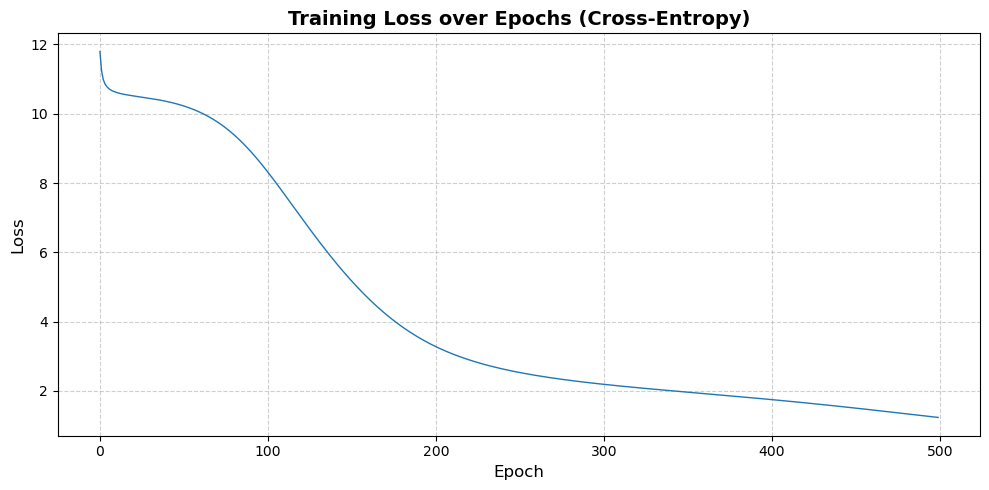

In [9]:
#  Plot loss curve over training epochs
plt.figure(figsize=(10, 5))
plt.plot(range(len(losses)), losses, linewidth=1.0)
plt.title("Training Loss over Epochs (Cross-Entropy)", fontsize=14, weight='bold')
plt.xlabel("Epoch", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [ ]:
# Prediction: user inputs a letter → model predicts next letter
while True:
    ch = input("\nEnter a letter: ").lower()
    if ch not in char_to_idx:
        print("Character not in training data!")
        continue

    # Start with zero hidden state
    h = np.zeros((hidden_size, 1))
    x = one_hot(char_to_idx[ch], input_size).reshape(-1, 1)

    # Forward pass for prediction
    h = sigmoid(np.dot(W_xh, x) + np.dot(W_hh, h) + b_h)
    y_pred = np.dot(W_hy, h) + b_y
    p = np.exp(y_pred) / np.sum(np.exp(y_pred))

    # Pick most probable next character
    next_idx = np.argmax(p)
    print("Predicted next letter:", idx_to_char[next_idx])


Enter a letter:  m


Predicted next letter: a
